<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%88%98%EC%8B%9C%EC%A0%84%ED%98%95%EB%B3%84%EC%A7%80%EC%9B%90%ED%8C%A8%ED%84%B4_D%EA%B3%A0RPA_%ED%95%99%EC%83%9D%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행하고 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
import csv
import matplotlib.pyplot as plt

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')
#df = pd.read_csv(f'{path}susi_jsi_noname.csv', encoding = 'cp949')

# 첫 5줄을 봅니다.
df.head(1)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

최저등급을 입력하세요: 1.5
최고등급을 입력하세요: 4
구간 크기를 입력하세요: 0.5


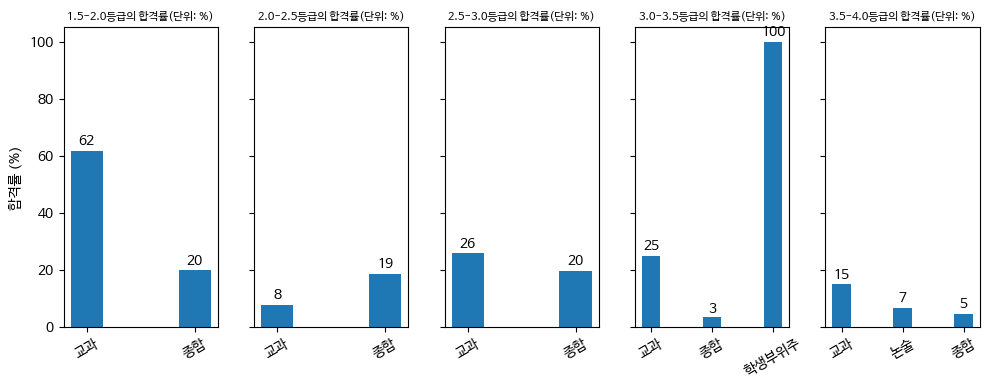

In [3]:
#1.내신등급의 구간별 교과, 종합의 합격률 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 최저 등급과 최고 등급을 입력받기
min_grade = float(input("최저등급을 입력하세요: "))
max_grade = float(input("최고등급을 입력하세요: "))

# 구간 크기 입력받기
interval_size = float(input("구간 크기를 입력하세요: "))


# 최저 등급부터 최고 등급까지 구간별로 반복
fig, axes = plt.subplots(1, int((max_grade - min_grade) / interval_size), figsize=(10, 4), sharey=True)  # 서브플롯 생성
for i, grade in enumerate(np.arange(min_grade, max_grade, interval_size)):
    mx = grade + interval_size
    mi = grade

    # mx이상 mi이하 조건을 충족하는 객체 만들기
    df_interval = df[(df.내신_전과목 >= mi) & (df.내신_전과목 < mx) & ~(df.전형분류 == '수능')].copy()

    # '전형분류'별 지원 건수 계산
    grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

    # '전형분류'별 합격 건수 계산
    grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')

    # 합치기
    grouped = pd.merge(grouped, grouped_pass, on='전형분류')

    # 합격률 계산
    grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

    # Plotting
    # Plotting
    ax = axes[i]
    bars = ax.bar(grouped['전형분류'], grouped['합격률'], width=0.3)
    #ax.set_xlabel('전형분류')
    if i == 0:
        ax.set_ylabel('합격률 (%)')  # y 레이블은 첫 번째 서브플롯에만 표시
    ax.set_title(f'{mi}-{mx}등급의 합격률(단위: %)', fontsize=8)
    ax.set_xticks(np.arange(len(grouped['전형분류']))) # x축 틱 위치 설정
    ax.set_xticklabels(grouped['전형분류'], rotation=30)  # x축 레이블 회전


    # 각 막대 위에 값을 표시
    for bar in bars:
        yval = round(bar.get_height())  # 반올림
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#2. 내신구간별 교과, 종합 지원 건수 대비 합격률 구체적 내용
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt


# 내신 구간별 지원패턴
mx = float(input("이상:"))
mi = float(input("미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.내신_전과목 >= mx) & (df.내신_전과목 < mi) & ~(df.전형분류 == '수능')].copy()

# '전형분류'별 지원 건수 계산 (grouped에 저장됨)
grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

# '전형분류'별 합격 건수 계산
grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')


# 합치기
grouped = pd.merge(grouped, grouped_pass, on='전형분류')

# 합격률 계산
grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

#headers를 만듬
all_headers = ['전형분류', '지원건수',  '합격건수', '합격률']

# Create the formatted table using tabulate
table_string = tabulate(grouped, headers = all_headers, tablefmt='plain')

print(table_string)

In [ ]:
#3. 해당 내신구간 학생들의 구체적 진학결과

from tabulate import tabulate

# 내신 구간별 지원패턴: 이름, 내신, 전형분류, 전형방법, 최종, 대학 출력
mx = float(input("이상:"))
mi = float(input("미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.내신_전과목 >= mx) & (df.내신_전과목 < mi) & ~(df.전형분류 == '수능')].copy()  # Note the .copy() here

# Show first two letters and replace the third letter with an asterisk in '이름' column
df_interval['이름'] = df_interval['이름'].apply(lambda x: x[:1] + '**' + x[3:] if len(x) >= 3 else x[:2])

list_1 = df_interval[['이름', '내신_전과목', '전형분류', '대학', '모집단위', '최종']]

#list_1 = df_interval[['이름', '내신_전과목', '전형분류', '전형방법', '최종', '대학', '모집단위']]
all_headers = ['이름', '내신_전과목', '전형분류','대학', '모집단위', '최종']


# Create the formatted table using tabulate
table_string = tabulate(list_1, headers=all_headers, tablefmt='plain')
print()
print(table_string)
print("------------------------------")
print("{}등급이상 {}등급미만 :{}건".format(mx, mi, len(df_interval)))

In [ ]:
#4. 지역균형(수시 교과) 합격자수와 합격률

#라이브러리 불러오기
from tabulate import tabulate


#전형명 중 지역균형을 찾기
df_지역균형 = df['전형명'].str.contains('^[지역균형]+')

#지역균형 열들만 모으기
subset_df = df.loc[df_지역균형]

#지역균형 합(격자)를 모으기
subset_df_p = subset_df.loc[subset_df['최종'] == '합'].copy()
#subset_df_p = subset_df.loc[subset_df['최종'] == '불'].copy()


#성만 표시하고 이름만 표시
# Show first two letters and replace the third letter with an asterisk in '이름' column
subset_df_p.loc[:, '이름'] = subset_df_p['이름'].apply(lambda x: x[:1] + '**' + x[3:] if len(x) >= 3 else x[:2])


# 전체 응시자 수 (지역균형 전형에 해당하는 행의 수)
total_applicants = len(df.loc[df_지역균형])

# 합격자 수
total_pass = len(subset_df_p)

# 합격률 계산
pass_rate = (total_pass / total_applicants) * 100

#필요한 변수(열) 부르기
subset_df_p = subset_df_p[['학번', '이름', '대학', '모집단위', '전형분류', '전형명',  '최종', '내신_전과목', '등급_평균', '백분위_평균', '표점합']]


# '내신_전과목' column의 값들을 소수점 둘째 자리까지 반올림
subset_df_p['내신_전과목'] = subset_df_p['내신_전과목'].round(2)

# '백분위_평균' column의 값들을 소수점 둘째 자리까지 반올림
subset_df_p['백분위_평균'] = subset_df_p['백분위_평균'].round(1)


#list_1 = df_interval[['이름', '내신_전과목', '전형분류', '전형방법', '최종', '대학', '모집단위']]
all_headers = ['학번', '이름', '대학', '모집단위', '전형분류', '전형명',  '최종', '내신_전과목', '등급_평균', '백분위_평균', '표점합']


# Create the formatted table using tabulate
table_string = tabulate(subset_df_p, headers=all_headers, tablefmt='plain')

print("***2023학년도 등촌고 지역균형 합격자 명단***")
print(table_string)
print("-----------------------------------------------------------------------------------------------------------------------------")
print(f"2023학년도 D고 지역균형(수시 교과) 합격자는 지원자{total_applicants}명 중 {len(subset_df_p)}명입니다(복수합격 포함).")
print()
print(f"2023학년도 D고 지역균형(수시 교과) 합격률은 {pass_rate:.0f}%입니다.") # 소수 둘째자리까지 출력

In [ ]:
nesin = [col for col in df if '전형' in col]
print(nesin)

In [ ]:
# 내신 구간별 지원경향: ex)2-2.5등급 - 교과 62% vs. 종합 38%
mx = float(input("이상:"))
mi = float(input("미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.내신_전과목 >= mx) & (df.내신_전과목 < mi) & ~(df.전형분류 == '수능')].copy()

# Group by '전형분류' and count the frequency
grouped = df_interval.groupby('전형분류').size().sort_values(ascending=False)

# Compute percentages and add "%" to the end of each value
total = len(df_interval)
percentages = (grouped / total * 100).round(0).astype(str) + "%"

# Combine frequency and percentage for display
combined = pd.DataFrame({'빈도': grouped, '비율': percentages})

print(combined)
print("---------------------------------")
print("{}등급이상 {}등급미만 :{}건".format(mx, mi, total))

In [ ]:
#내신구간별 교과, 종합 지원 건수 및 6장으로 환산
import numpy as np
import pandas as pd
from tabulate import tabulate


# 내신 구간별 지원패턴
mx = float(input("이상:"))
mi = float(input("미만:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.내신_전과목 >= mx) & (df.내신_전과목 < mi)].copy()

# Group by '전형분류' and count the frequency
grouped = df_interval.groupby('전형분류').size().sort_values(ascending=False).reset_index(name='빈도')

grouped = grouped[~(grouped.전형분류 == '수능')]

# Calculate the total
total = grouped['빈도'].sum()

# Compute the percentage
grouped['비율'] = (grouped['빈도'] / total * 100).round(2)

# Compute the fraction with a denominator of 6
grouped['분수'] = (np.round(grouped['비율'] / 100 * 6)).astype(int).astype(str) + "/6"

# Reorder the columns for display
combined = grouped[['빈도', '분수', '비율', '전형분류']]


#headers를 만듬
all_headers = ['빈도', '분수', '비율', '전형분류']

# Create the formatted table using tabulate
table_string = tabulate(combined, headers = all_headers, tablefmt='plain')

print(table_string)
print("---------------------------------")
print("등촌고 {}등급 이상 {}등급 미만: {}건".format(mx, mi, total))

In [ ]:
# 수시 전체합격자들의 평균합격건수

# 라이브러리
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/python/deungchon/susi_jsi.csv', encoding='cp949')

# 4년제대 합격자
kg_df = df[(df.최종 == '합') & ~(df.이름 == '이지은')]

# 이름별 합격건수
kg_df_count = kg_df.groupby('이름')['최종'].count()

#1인당 최다 합격건수
s_max = kg_df_count.max()

# Convert the index to a modified version of itself
kg_df_count.index = kg_df_count.index.map(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])


#중복제외한 합격자
st = kg_df['이름'].unique()


#중복제외한 합격자
st_num = len(st)


#총합격건수
#total = kg_df['최종'].count()
total = len(kg_df)


# 평균 합격 건수
average_count = kg_df_count.mean().round(1)


print(f"합격자수는 {st_num}명이고 총합격건수는 {total}건입니다.")
print(f"학생1인당 최다 합격건수는 {s_max}건입니다")
print()
print(kg_df_count)
print(f"학생당 수시 6회 중 합격횟수: {average_count}건")

In [ ]:
# 4년제대 합격자들의 평균합격건수

# 라이브러리
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/python/deungchon/susi_jsi.csv', encoding='cp949')

# 4년제대 합격자
kg_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 이름별 합격건수
kg_df_count = kg_df.groupby('이름')['최종'].count()


# Convert the index to a modified version of itself
kg_df_count.index = kg_df_count.index.map(lambda x: x[:2] + '*' + x[3:] if len(x) >= 3 else x[:2])


#중복제외한 합격자
st = kg_df['이름'].unique()


#중복제외한 합격자
st_num = len(st)


#총합격건수
#total = kg_df['최종'].count()
total = len(kg_df)


# 평균 합격 건수
average_count = kg_df_count.mean().round(1)


print(f"합격자수는 {st_num}명이고 총합격건수는 {total}건입니다.")
print()
print(kg_df_count)
print(f"학생당 수시 6회 중 합격횟수: {average_count}건")

In [ ]:
#필요한 변수(열)만 불러옴
kg_df = kg_df[['수시정시', '지역', '학번', '이름', '대학', '모집단위', '최종', '내신_전과목', '등급_평균', '전형분류']]
#print(seoul_df)
print(kg_df)


#경기지역 합격자수
print("\n---------------------------------------------------------------------------------------")
print("2023학년도  D고 경기지역 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(kg_df))


#데이터 프레임으로 전환
kg_df_p = pd.DataFrame(kg_df)

#결과를 엑셀로 저장
kg_df_p.to_excel(excel_writer= '/content/drive/MyDrive/python/deungchon/result_d/kg.xlsx')

In [ ]:
#특정대 지원자명단 및 합격건수

#변수를 정렬해서 보여주는 라이브러리
from tabulate import tabulate

#대학 입력값
uni = input('어느대학 지원자를 알고 싶나요?(4년제의 경우 대로 끝나게 입력):')


#대학 지원자 추출
kg_df = df[(df.대학 == uni)].copy()

#지원건수
kg_df_num =len(kg_df)


# 성만 나오고 이름은 별표 표시
kg_df['이름'] = kg_df['이름'].apply(lambda x: x[:1] + '**' + x[3:] if len(x) >= 3 else x[:2])


#필요한 변수(열)만 불러옴
kg_df = kg_df[['수시정시', '지역', '학번', '이름', '대학', '모집단위', '최종', '내신_전과목', '등급_평균', '전형명', '전형종류', '전형일자', '전형분류', '전형방법']]


#list_1 = df_interval[['이름', '내신_전과목', '전형분류', '전형방법', '최종', '대학', '모집단위']]
all_headers = ['수시정시', '지역', '학번', '이름', '대학', '모집단위', '최종', '내신_전과목', '등급_평균', '전형명', '전형종류', '전형일자', '전형분류', '전형방법']


# Create the formatted table using tabulate
table_string = tabulate(kg_df, headers=all_headers, tablefmt='plain')
print()
print(table_string)


#지원자수
print("\n---------------------------------------------------------------------------------------")
print(f"2023학년도 {uni} 지원건수: {kg_df_num}")